# Stochastic Simulation Assignment 3


### **Contributors**  
- **Maarten Stork**  
- **Paul Jungnickel**  
- **Lucas Keijzer**

### **Overview**  
This notebook contains the code and analysis for **Assignment 3 of Stochastic Simulation**. The code follows the order specified in the assignment guidelines and replicates the experiments conducted in the referenced paper. Each section corresponds to (a) key experiment(s).

In [1]:
from CircleParticleSim import *
import numpy as np
import numpy.random as rand

# 1)

# 2)

# 3)

# 4)

In [ ]:
rand.seed(42)
run_count = 100
num_probs = 50
num_particles = 50
probs = np.linspace(0,1,num_probs)
arrs = np.zeros([num_probs, run_count]) 

for i, p in enumerate(probs):
    for j in range(run_count):
        sim  = CircleParticleSim(num_particles, steps=100000, seed=rand.randint(0,2**31-1),
                    cooling_schedule = paper_cooling_schedule,
                    step_size_schedule = sqrt_step_size_schedule,
                    random_step_likelihood=p
                    )
        sim.run_simulation(10000)
        arrs[i,j] = sim.E

    print('.', end='')

    
np.save('data/data-4-{}-{}.npy'.format(num_particles, run_count), arrs)





/mnt/c/Users/paul/Desktop/Uni/cls/Stochastic_Simulation_Assignment_3/CircleParticleSim.py:275: RuntimeWarning: overflow encountered in exp
  acceptance = min(1, np.exp(-dE / self.T))


....................

(17, 100)


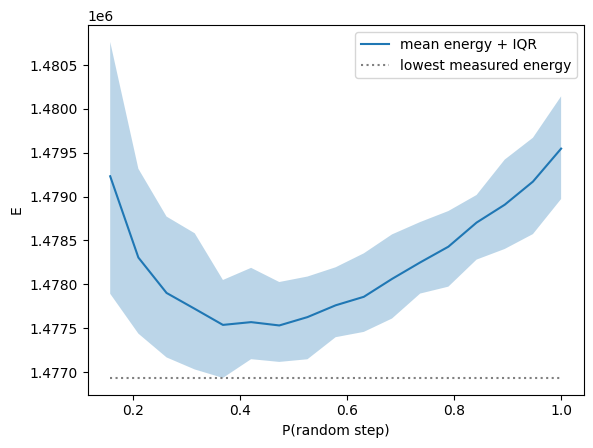

In [8]:

arrs = np.load('data/data-4-1000.npy')
arrs = arrs[3:]
probs1 = probs[3:]
print(arrs.shape)
mean = np.mean(arrs, axis=1)
min_energy = np.min(arrs)
plt.plot(probs1, mean, label='mean energy + IQR')
# plt.plot(probs, np.percentile(arrs, 5, axis=1))
plt.fill_between(probs1, np.percentile(arrs, 0, axis=1), np.percentile(arrs, 99, axis=1), alpha=0.3)
plt.plot(probs1, min_energy*np.ones_like(probs1), linestyle = ':', color='gray', label='lowest measured energy')
plt.xlabel('P(random step)')
plt.ylabel('E')
plt.legend()